In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
movie = pd.read_csv("movies.csv")

In [3]:
movie.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8043 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [86]:
sum(movie["release_year"]>=2000) 

0.65967237253819255

### Movie industry changes over time. Among the 10866 movies since 1960,  7168 was produced since 2000, or 66%. I will be focused on the data in 2000-2015.

In [87]:
movie = movie [movie["release_year"]>=2000]

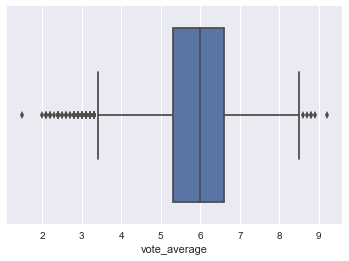

In [88]:
sns.boxplot(movie["vote_average"])

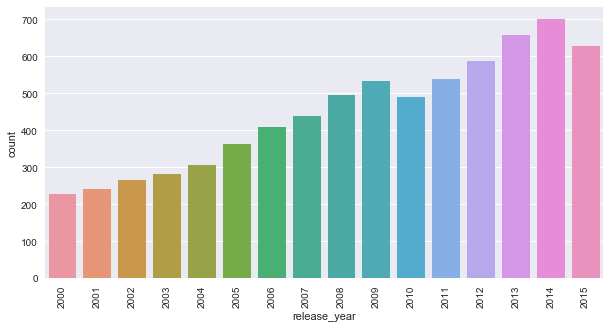

In [90]:
plt.figure (figsize=(10,5))
ax = sns.countplot(movie["release_year"])
plt.xticks(rotation=90)
# ax.set_xticklabels(movie["release_year"], rotation=90,fontsize=15)
plt.show()

In [91]:
num = movie.shape[0]

## **Question 1:** How have movie genres changed over time?

**It turns out Tableau is much better at aggregation plot than seaborn/matplotlib.**

In [92]:
genres = movie['genres'].unique() # len: 2040, due to remix
movie['genres'].value_counts()[0:10]

Drama                   521
Comedy                  493
Documentary             290
Horror|Thriller         196
Drama|Romance           181
Comedy|Drama            181
Comedy|Romance          177
Horror                  170
Comedy|Drama|Romance    139
Drama|Thriller          102
Name: genres, dtype: int64

In [93]:
data = movie.loc[:,['id','release_year','genres']]

In [94]:
data['genres']=data['genres'].apply(lambda s: str(s).split("|")[0])

In [95]:
data.head()

,id,release_year,genres
0,135397,2015,Action
1,76341,2015,Action
2,262500,2015,Adventure
3,140607,2015,Action
4,168259,2015,Action


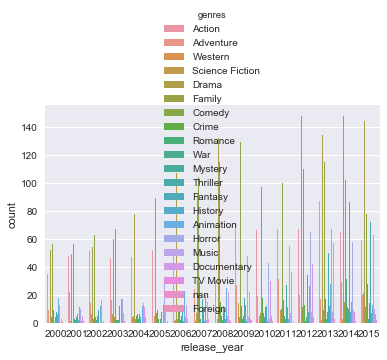

In [96]:
sns.countplot(x = "release_year", hue = "genres", data = data)

In [97]:
gb = data.groupby(["release_year", "genres"]).count()

In [98]:
gb.head()

id
release_year genres       
2000         Action     35
             Adventure   9
             Animation  18
             Comedy     56
             Crime       9

##  Q 2: How do the attributes differ between Universal Pictures and Paramount Pictures?

In [99]:
attributes = ["budget_adj", "revenue_adj", "tagline", "keywords","genres","production_companies", "vote_average","release_year"]
data = movie[attributes]

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 8 columns):
budget_adj              7168 non-null float64
revenue_adj             7168 non-null float64
tagline                 4987 non-null object
keywords                5904 non-null object
genres                  7150 non-null object
production_companies    6319 non-null object
vote_average            7168 non-null float64
release_year            7168 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 504.0+ KB


In [101]:
data["production_companies"]=data["production_companies"].apply(lambda s: str(s).split("|")[0])

/Users/yuchaojiang/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [102]:
data["production_companies"].value_counts()[0:10]

nan                                       849
Universal Pictures                        200
Paramount Pictures                        162
Columbia Pictures                         149
Walt Disney Pictures                      140
New Line Cinema                           120
Twentieth Century Fox Film Corporation     96
Village Roadshow Pictures                  70
Miramax Films                              67
DreamWorks SKG                             64
Name: production_companies, dtype: int64

In [107]:
two = data[(data["production_companies"] == "Paramount Pictures")| 
           (data["production_companies"] =="Universal Pictures") ]

In [108]:
two1 = two[(two["budget_adj"]>0) & (two["revenue_adj"]>0)]  # remove missing data

In [109]:
two1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 4 to 8866
Data columns (total 8 columns):
budget_adj              288 non-null float64
revenue_adj             288 non-null float64
tagline                 281 non-null object
keywords                283 non-null object
genres                  288 non-null object
production_companies    288 non-null object
vote_average            288 non-null float64
release_year            288 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 20.2+ KB


In [110]:
two1.groupby("production_companies").median()

,budget_adj,revenue_adj,vote_average,release_year
production_companies,,,,
Paramount Pictures,6.050051e+07,1.232617e+08,6.0,2006
Universal Pictures,4.748721e+07,1.059018e+08,6.1,2008


In [111]:
two1["production_companies"].value_counts()

Universal Pictures    154
Paramount Pictures    134
Name: production_companies, dtype: int64

## Q3: How have movies based on novels performed relative to movies not based on novels?

In [114]:
data = movie[movie["keywords"].notnull()]  # 5904
cnt = 0
total = data.shape[0]
for i,keyword in data['keywords'].iteritems():
    if "based" in keyword:
        cnt += 1
        #print(cnt,i,keyword)
print(cnt,total)
#  since 1960 /2000
# "novel" 295 /193
# "true" 58
# "based" 495 /344
# "nudity" 283/151

344 5904


In [115]:
attributes = ["budget_adj", "revenue_adj", "tagline", "keywords","genres","production_companies", "vote_average","release_year"]
data = data[attributes]

In [116]:
data ['novel'] = data['keywords'].apply(lambda x: "novel" in x)

In [120]:
data1 = data[(data["budget_adj"]>0) & (data["revenue_adj"]>0)] 

In [121]:
data1.groupby('novel').median()

,budget_adj,revenue_adj,vote_average,release_year
novel,,,,
False,3.039101e+07,5.968169e+07,6.1,2008
True,3.129854e+07,6.172770e+07,6.5,2011


In [123]:
data1['novel'].value_counts()

False    2260
True      130
Name: novel, dtype: int64

In [124]:
130/2260

0.05752212389380531

## Q4: What are the best-selling movies

In [127]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 21 columns):
id                      7168 non-null int64
imdb_id                 7158 non-null object
popularity              7168 non-null float64
budget                  7168 non-null int64
revenue                 7168 non-null int64
original_title          7168 non-null object
cast                    7105 non-null object
homepage                2730 non-null object
director                7129 non-null object
tagline                 4987 non-null object
keywords                5904 non-null object
overview                7164 non-null object
runtime                 7168 non-null int64
genres                  7150 non-null object
production_companies    6319 non-null object
release_date            7168 non-null object
vote_count              7168 non-null int64
vote_average            7168 non-null float64
release_year            7168 non-null int64
budget_adj              7168 non-null floa

In [130]:
movie[movie["original_title"]== "Avatar"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [133]:
data['genres']=data['genres'].apply(lambda s: str(s).split("|")[0])

In [136]:
data [data['genres']== "Animation"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 81 to 8859
Data columns (total 9 columns):
budget_adj              248 non-null float64
revenue_adj             248 non-null float64
tagline                 153 non-null object
keywords                248 non-null object
genres                  248 non-null object
production_companies    234 non-null object
vote_average            248 non-null float64
release_year            248 non-null int64
novel                   248 non-null bool
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 17.7+ KB
